In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('/content/seattle-weather.csv.xls', parse_dates=['date'])
data.set_index('date', inplace=True)

In [71]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [72]:
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [73]:
features = ['temp_max']
data = data[features].values

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [75]:
def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 0])  # Assuming the first feature is the one we're predicting
    return np.array(X), np.array(y)

sequence_length = 30  # Look back 30 days
X, y = create_sequences(data_scaled, sequence_length)

In [76]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, activation='relu', input_shape=(xtrain.shape[1], xtrain.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
history = model.fit(xtrain, ytrain, epochs=30, batch_size=64, validation_data=(xtest, ytest), verbose=1)


Epoch 1/30
18/18 [==============================] - 14s 156ms/step - loss: 0.1341 - val_loss: 0.0273
Epoch 2/30
18/18 [==============================] - 2s 132ms/step - loss: 0.0252 - val_loss: 0.0144
Epoch 3/30
18/18 [==============================] - 3s 141ms/step - loss: 0.0187 - val_loss: 0.0121
Epoch 4/30
18/18 [==============================] - 2s 115ms/step - loss: 0.0179 - val_loss: 0.0109
Epoch 5/30
18/18 [==============================] - 2s 109ms/step - loss: 0.0168 - val_loss: 0.0125
Epoch 6/30
18/18 [==============================] - 1s 64ms/step - loss: 0.0156 - val_loss: 0.0106
Epoch 7/30
18/18 [==============================] - 1s 68ms/step - loss: 0.0158 - val_loss: 0.0115
Epoch 8/30
18/18 [==============================] - 1s 68ms/step - loss: 0.0153 - val_loss: 0.0107
Epoch 9/30
18/18 [==============================] - 1s 75ms/step - loss: 0.0156 - val_loss: 0.0116
Epoch 10/30
18/18 [==============================] - 2s 98ms/step - loss: 0.0154 - val_loss: 0.0108
Epo

In [79]:
his = pd.DataFrame(history.history)

In [80]:
his.head()

,loss,val_loss
0,0.134052,0.027286
1,0.025204,0.014402
2,0.018670,0.012138
3,0.017940,0.010883
4,0.016779,0.012457


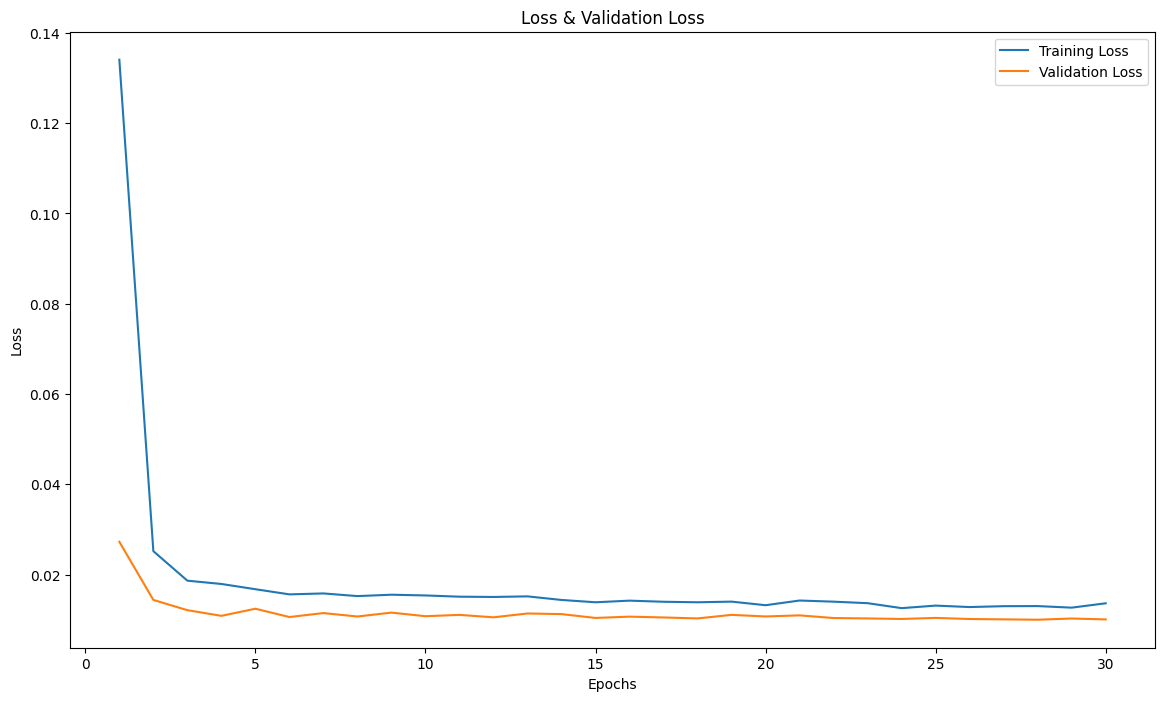

In [81]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 8))
plt.title("Loss & Validation Loss")

epochs = range(1, len(history.history['loss']) + 1)

sns.lineplot(x=epochs, y=history.history['loss'], label='Training Loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], label='Validation Loss', ax=ax)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-en-es"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = "Hi my name is Sanin Zulphi."

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

translated = model.generate(**inputs)

translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)

print("Translated text:", translated_text)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translated text: Hola, mi nombre es Sanin Zulphi.
